In [2]:
import pandas as pd 

pos_tag = pd.read_csv('real_pos_tag.csv')


pos_tag = pos_tag["col"].tolist()

In [3]:

from nltk.corpus import wordnet
 
syn1 = wordnet.synsets('hello')[0]
syn2 = wordnet.synsets('selling')[0]
 
print ("hello name :  ", syn1.name())
print ("selling name :  ", syn2.name())

syn1.wup_similarity(syn2)


hello name :   hello.n.01
selling name :   selling.n.01


0.26666666666666666

In [4]:
# loop once 
syn_row = []
word_row = []
for tag in pos_tag:
    try:
        test = wordnet.synsets(tag)[0]
        syn_row.append(test)
        word_row.append(tag)
    except:
        print("word not in wordnet",tag)

word not in wordnet anadama
word not in wordnet cheshire
word not in wordnet dungeness
word not in wordnet alfredo
word not in wordnet kai


In [5]:
syn_matrix = []
for i in range(len(syn_row)):
    syn_row[i]
    rowlist = []
    rowlist.append(word_row[i])
    for col in syn_row:
        score = syn_row[i].wup_similarity(col)
        rowlist.append(score)
    syn_matrix.append(rowlist)
    


# creating df object with columns specified 
word_row = ["tag"] + word_row
df = pd.DataFrame(syn_matrix, columns = word_row) 
print(df)

            tag     bread  breadstick     brown       bun   caraway      seed  \
0         bread  1.000000    0.941176  0.133333  0.941176  0.235294  0.235294   
1    breadstick  0.941176    1.000000  0.125000  0.888889  0.222222  0.222222   
2         brown  0.133333    0.125000  1.000000  0.125000  0.111111  0.111111   
3           bun  0.941176    0.888889  0.125000  1.000000  0.222222  0.222222   
4       caraway  0.235294    0.222222  0.111111  0.222222  1.000000  0.400000   
..          ...       ...         ...       ...       ...       ...       ...   
415       round  0.250000    0.235294  0.117647  0.235294  0.421053  0.421053   
416        slop  0.666667    0.625000  0.133333  0.625000  0.235294  0.235294   
417      yogurt  0.750000    0.705882  0.142857  0.705882  0.250000  0.250000   
418   blueberry  0.222222    0.210526  0.105263  0.210526  0.761905  0.380952   
419      frozen  0.181818    0.166667  0.166667  0.166667  0.142857  0.142857   

      challah  cinnamon   c

In [8]:
df.to_csv("similarity_matrix.csv")

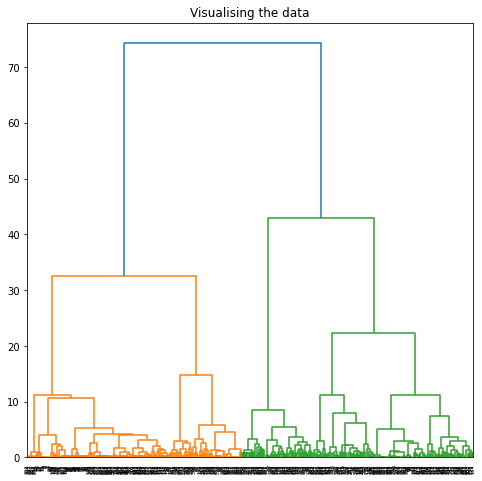

In [32]:
similarity_matrix = pd.read_csv("similarity_matrix.csv")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


df_drop = df.drop(columns="tag")

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df_drop, method ='ward')))


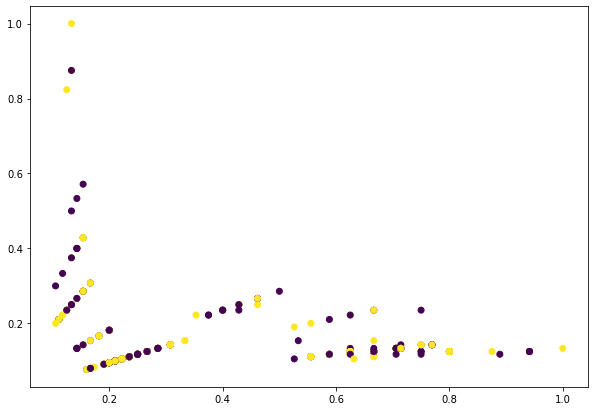

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')  
cluster.fit_predict(df_drop)




# from sklearn.cluster import AgglomerativeClustering
# data_matrix = df_drop
# model = AgglomerativeClustering(affinity='precomputed', n_clusters=2, linkage='complete').fit(similarity_matrix)


plt.figure(figsize=(10, 7))  
plt.scatter(df_drop['bread'], df_drop['brown'], c=cluster.labels_) 

ValueError: 'c' argument has 420 elements, which is inconsistent with 'x' and 'y' with size 176400.

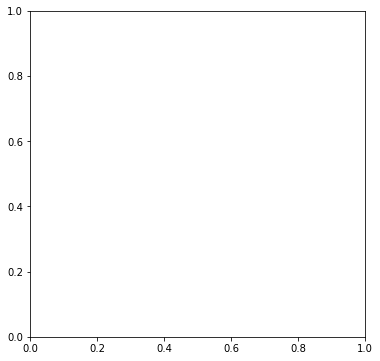

In [27]:

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_drop,df_drop,
           c = ac2.fit_predict(df_drop), cmap ='rainbow')
plt.show()

#### 